#Theoretical Questions

### **1. What is unsupervised learning in the context of machine learning?**

Unsupervised learning is a type of machine learning where the model learns patterns from unlabeled data. The goal is to group similar data points or reduce dimensions without any predefined output. Clustering and dimensionality reduction are key examples.

---

### **2. How does K-Means clustering algorithm work?**

K-Means partitions data into `K` clusters by:

* Randomly initializing `K` centroids
* Assigning each data point to the nearest centroid
* Recomputing centroids as the mean of assigned points
* Repeating until centroids stabilize or reach a set iteration limit.

---

### **3. Explain the concept of a dendrogram in hierarchical clustering.**

A dendrogram is a tree-like diagram that records the sequence of merges or splits in hierarchical clustering. It shows how clusters are combined step by step and helps determine the optimal number of clusters by cutting at a specific height.

---

### **4. What is the main difference between K-Means and Hierarchical Clustering?**

* **K-Means** is a partitional method needing a predefined number of clusters.
* **Hierarchical clustering** builds a hierarchy (tree) and doesn't require pre-specifying the number of clusters.
  Also, K-Means is faster on large datasets, while hierarchical methods are more interpretable.

---

### **5. What are the advantages of DBSCAN over K-Means?**

* It detects clusters of arbitrary shape.
* It doesn't require specifying the number of clusters.
* It handles noise and outliers better by labeling them separately.

---

### **6. When would you use Silhouette Score in clustering?**

Silhouette Score evaluates how well each point fits within its cluster. It helps determine the quality of clustering and compare different values of K or clustering algorithms. A higher score (closer to 1) indicates better-defined clusters.

---

### **7. What are the limitations of Hierarchical Clustering?**

* Computationally expensive for large datasets.
* Once a merge or split is made, it cannot be undone (no backtracking).
* Sensitive to noise and outliers.

---

### **8. Why is feature scaling important in clustering algorithms like K-Means?**

K-Means uses distance measures (e.g., Euclidean), which are sensitive to the scale of data. Unscaled features can dominate clustering. Feature scaling (like standardization) ensures fair contribution of all features.

---

### **9. How does DBSCAN identify noise points?**

DBSCAN labels a point as noise (outlier) if it’s not reachable by a minimum number of points (`min_samples`) within a specified radius (`eps`). Such points are not part of any cluster.

---

### **10. Define inertia in the context of K-Means.**

Inertia is the sum of squared distances between each point and its assigned cluster centroid. It measures how internally coherent the clusters are — lower values indicate tighter clusters.

---

### **11. What is the elbow method in K-Means clustering?**

The elbow method plots the inertia against the number of clusters `K`. The "elbow point" (where inertia starts to reduce more slowly) suggests an optimal value for `K`.

---

### **12. Describe the concept of "density" in DBSCAN.**

Density refers to the number of data points within a specified radius (`eps`). A region is considered dense if it contains at least `min_samples` points. DBSCAN expands clusters from these dense regions.

---

### **13. Can hierarchical clustering be used on categorical data?**

Yes, but it requires appropriate distance measures like Hamming or Jaccard distance. Standard Euclidean-based linkage may not work well for purely categorical data.

---

### **14. What does a negative Silhouette Score indicate?**

A negative Silhouette Score means the point may be assigned to the wrong cluster, as it lies closer to a neighboring cluster than its own. It suggests poor clustering.

---

### **15. Explain the term "linkage criteria" in hierarchical clustering.**

Linkage criteria determine how the distance between clusters is calculated:

* **Single linkage**: minimum distance between points.
* **Complete linkage**: maximum distance.
* **Average linkage**: average distance.
* **Ward’s method**: minimizes variance within clusters.

---

### **16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?**

K-Means assumes spherical, equally sized clusters. It struggles when clusters have:

* Different sizes
* Different densities
* Irregular shapes
  This leads to incorrect assignments or centroids.

---

### **17. What are the core parameters in DBSCAN, and how do they influence clustering?**

* **`eps` (epsilon)**: radius around a point to consider neighbors.
* **`min_samples`**: minimum number of neighbors to form a dense region.
  Larger `eps` may merge clusters; smaller values may detect more noise.

---

### **18. How does K-Means++ improve upon standard K-Means initialization?**

K-Means++ chooses initial centroids smartly — spreading them out instead of random selection. This leads to:

* Faster convergence
* Better clustering performance
* Reduced chances of poor local minima

---

### **19. What is agglomerative clustering?**

Agglomerative clustering is a bottom-up hierarchical clustering method. It starts with each data point as its own cluster and merges the closest pairs iteratively until one big cluster or a stopping condition is reached.

---

### **20. What makes Silhouette Score a better metric than just inertia for model evaluation?**

Silhouette Score evaluates both:

* **Cohesion**: how similar a point is to its cluster
* **Separation**: how dissimilar it is from other clusters
  Unlike inertia (which always decreases as `K` increases), Silhouette balances intra- and inter-cluster performance.




# Practical

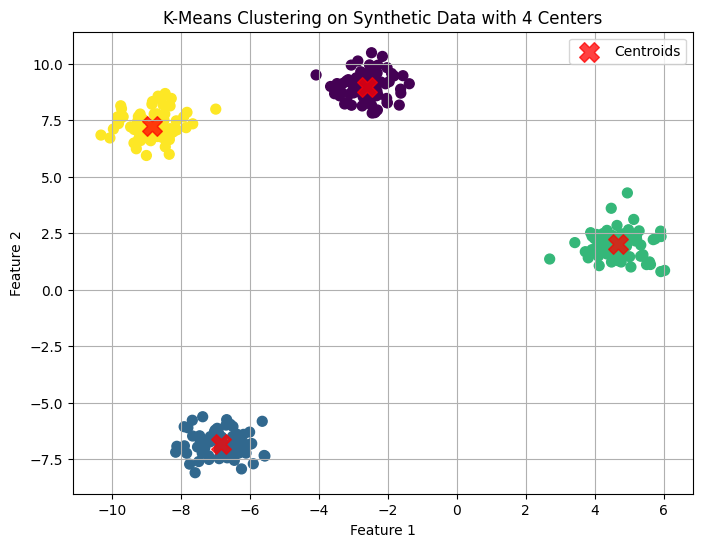

In [1]:
#21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.

# Step 1: Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 2: Generate synthetic dataset with 4 centers
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 4: Plot the clusters and centroids
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering on Synthetic Data with 4 Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
#22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.

# Step 1: Import required libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 3: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(X_scaled)

# Step 5: Display the first 10 predicted labels
print("First 10 predicted cluster labels:")
print(labels[:10])


First 10 predicted cluster labels:
[1 1 1 1 1 1 1 1 1 1]


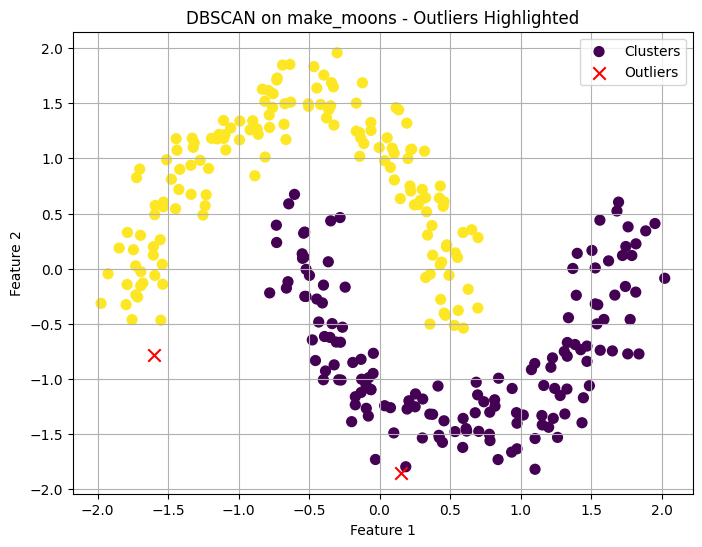

In [3]:
#23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.

# Step 1: Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 2: Generate synthetic "moons" data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Step 3: Feature scaling (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 5: Plotting the results
plt.figure(figsize=(8,6))
# Core and border points
plt.scatter(X_scaled[labels != -1, 0], X_scaled[labels != -1, 1],
            c=labels[labels != -1], cmap='viridis', s=50, label="Clusters")
# Outliers (label = -1)
plt.scatter(X_scaled[labels == -1, 0], X_scaled[labels == -1, 1],
            c='red', marker='x', s=80, label="Outliers")

plt.title("DBSCAN on make_moons - Outliers Highlighted")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
#24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.

# Step 1: Import required libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Step 2: Load the Wine dataset
wine = load_wine()
X = wine.data

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Step 5: Print the size of each cluster
unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:")
for cluster, size in zip(unique, counts):
    print(f"Cluster {cluster}: {size} samples")


Cluster sizes:
Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


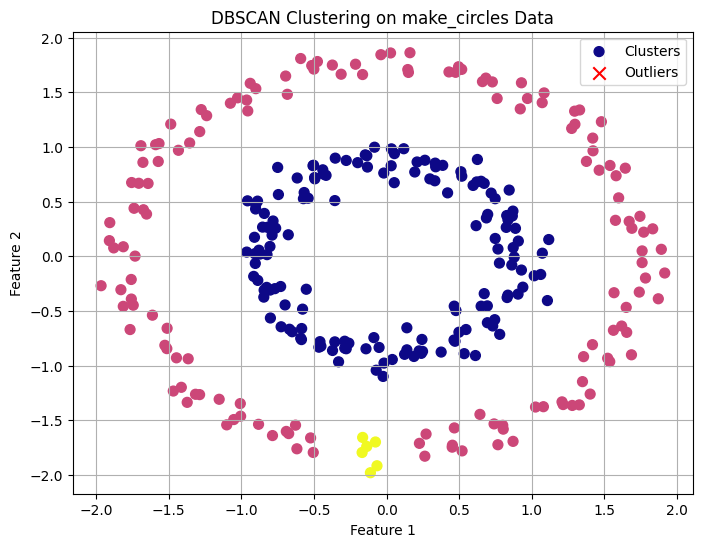

In [5]:
#25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.

# Step 1: Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Step 2: Generate circular synthetic data
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Step 3: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 5: Visualize the results
plt.figure(figsize=(8,6))
# Plot clustered points
plt.scatter(X_scaled[labels != -1, 0], X_scaled[labels != -1, 1],
            c=labels[labels != -1], cmap='plasma', s=50, label='Clusters')

# Plot noise/outliers
plt.scatter(X_scaled[labels == -1, 0], X_scaled[labels == -1, 1],
            c='red', marker='x', s=80, label='Outliers')

plt.title("DBSCAN Clustering on make_circles Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
#26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.

# Step 1: Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

# Step 2: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
feature_names = data.feature_names

# Step 3: Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Step 5: Output the cluster centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
print("Cluster Centroids (scaled features):")
print(centroids)


Cluster Centroids (scaled features):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst fracta

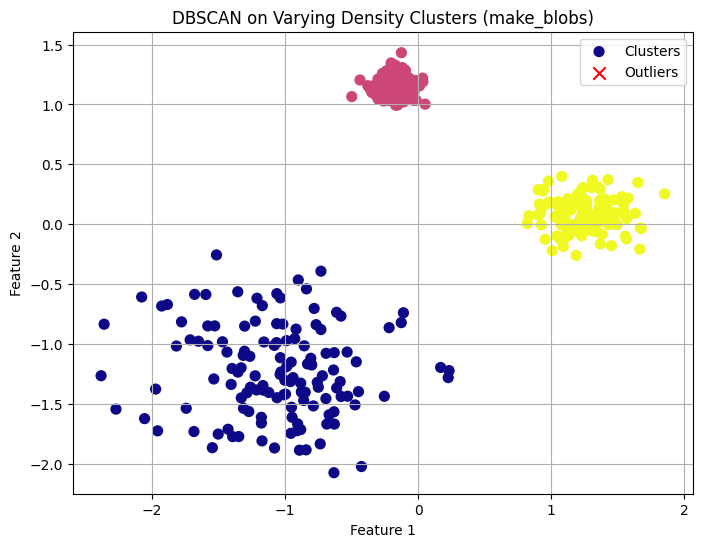

In [7]:
#27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.

# Step 1: Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Step 2: Generate synthetic data with varying std deviations
X, _ = make_blobs(n_samples=400, centers=3,
                  cluster_std=[0.5, 1.0, 2.5], random_state=42)

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 5: Plot the clustered data
plt.figure(figsize=(8,6))
# Plot core and border points
plt.scatter(X_scaled[labels != -1, 0], X_scaled[labels != -1, 1],
            c=labels[labels != -1], cmap='plasma', s=50, label="Clusters")

# Plot outliers
plt.scatter(X_scaled[labels == -1, 0], X_scaled[labels == -1, 1],
            c='red', marker='x', s=80, label="Outliers")

plt.title("DBSCAN on Varying Density Clusters (make_blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


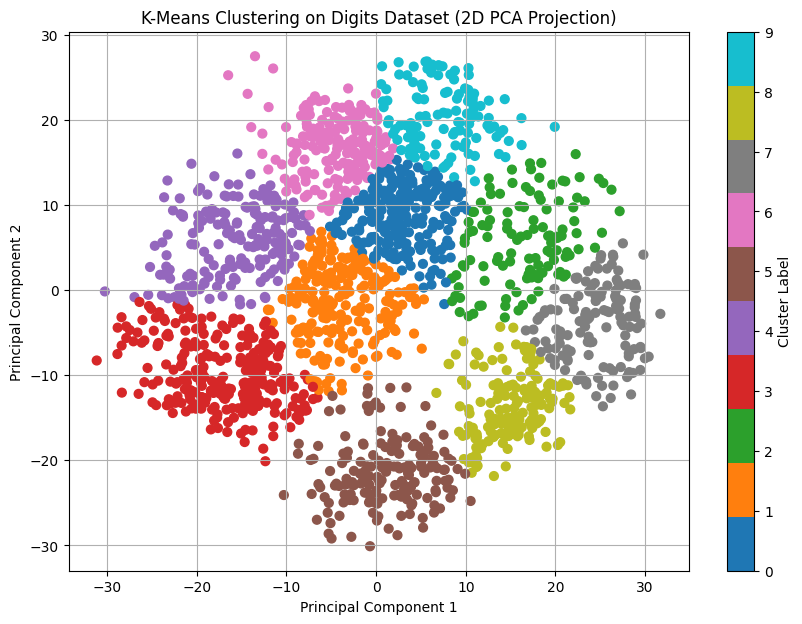

In [8]:
#28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.

# Step 1: Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 2: Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target  # (Optional: actual labels for comparison)

# Step 3: Reduce data to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 4: Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Step 5: Visualize the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=40)
plt.title("K-Means Clustering on Digits Dataset (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()


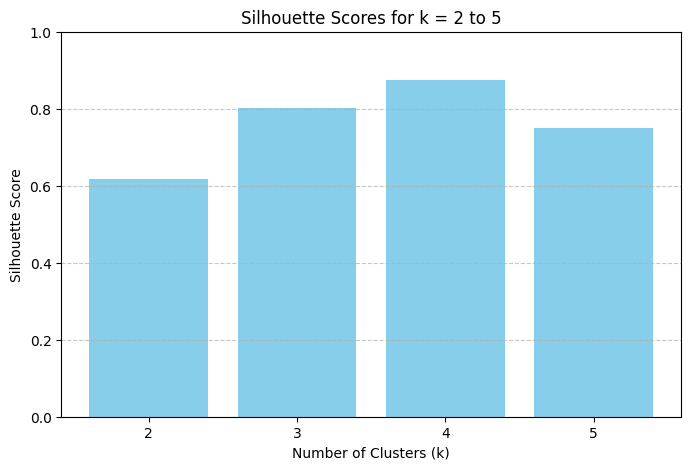

In [9]:
#29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.

# Step 1: Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 2: Generate synthetic data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Step 3: Evaluate silhouette scores for k = 2 to 5
silhouette_scores = []

k_values = range(2, 6)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Step 4: Plot silhouette scores as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(k_values, silhouette_scores, color='skyblue')
plt.title("Silhouette Scores for k = 2 to 5")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


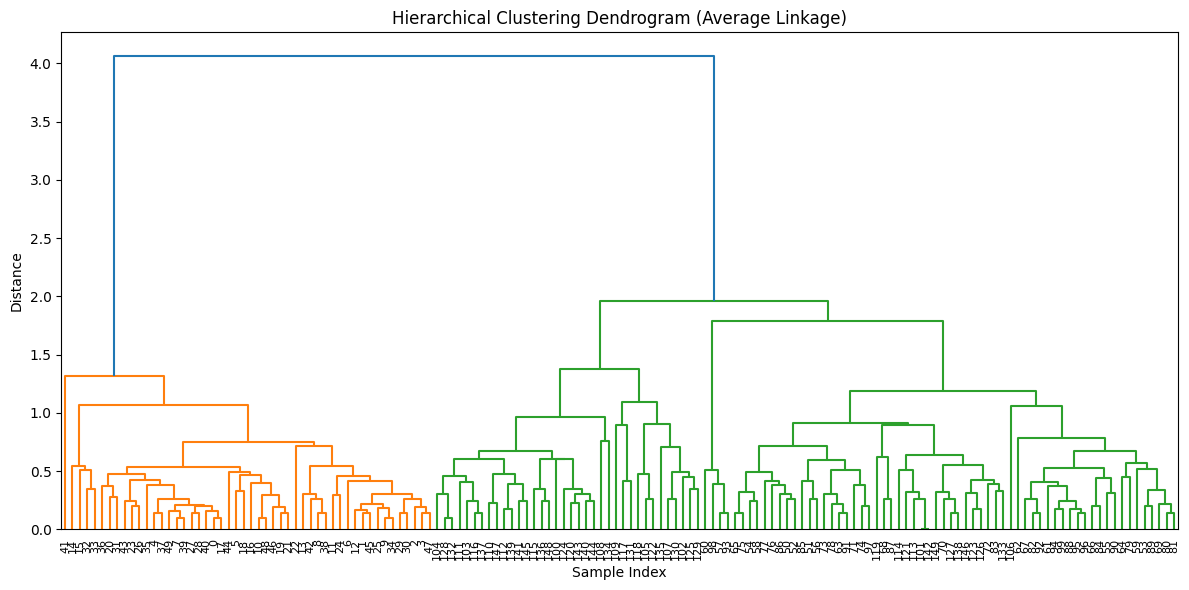

In [10]:
#30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.

# Step 1: Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 3: Compute linkage matrix using average linkage method
Z = linkage(X, method='average')

# Step 4: Plot the dendrogram
plt.figure(figsize=(12, 6))
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")

dendrogram(Z, leaf_rotation=90., leaf_font_size=8., color_threshold=0.7*max(Z[:,2]))

plt.tight_layout()
plt.show()


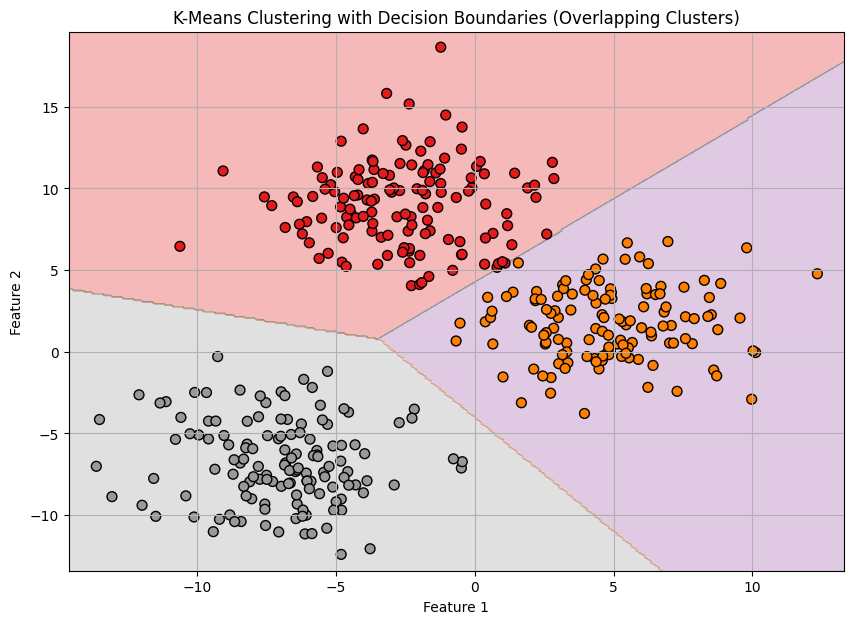

In [11]:
#31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic overlapping data
X, y_true = make_blobs(n_samples=400, centers=3, cluster_std=2.5, random_state=42)

# Step 2: Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Step 3: Create a mesh grid for decision boundary plotting
h = 0.1  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Step 4: Predict cluster labels for each point in mesh grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot decision boundaries and data points
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')

# Plot original data points colored by cluster label
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', edgecolor='k', s=50)
plt.title("K-Means Clustering with Decision Boundaries (Overlapping Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


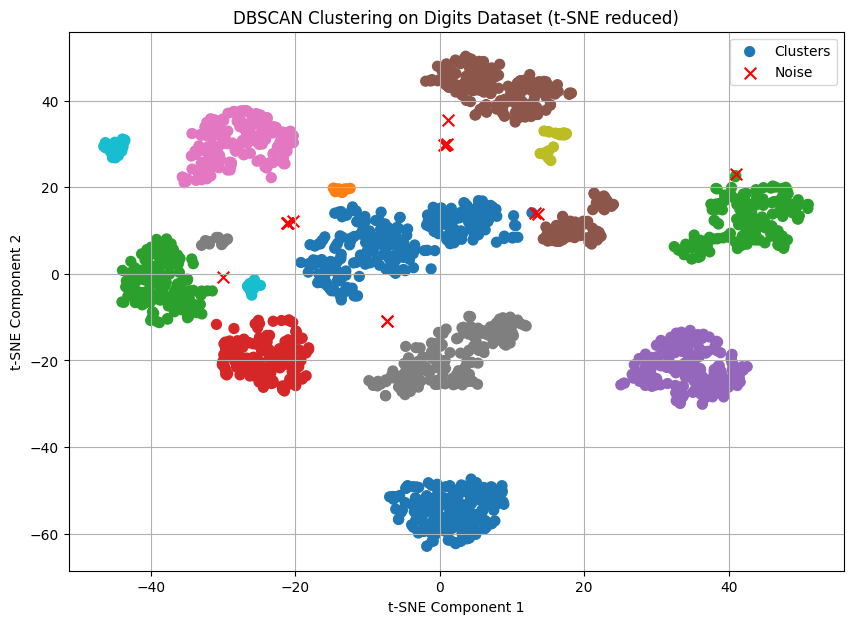

In [12]:
#32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load Digits dataset
digits = load_digits()
X = digits.data

# Step 2: Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Step 3: Apply DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Step 4: Plotting
plt.figure(figsize=(10, 7))

# Core and border points (clusters)
mask = labels != -1
plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=labels[mask], cmap='tab10', s=50, label='Clusters')

# Noise points (outliers)
plt.scatter(X_tsne[labels == -1, 0], X_tsne[labels == -1, 1], c='red', marker='x', s=70, label='Noise')

plt.title("DBSCAN Clustering on Digits Dataset (t-SNE reduced)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid(True)
plt.show()


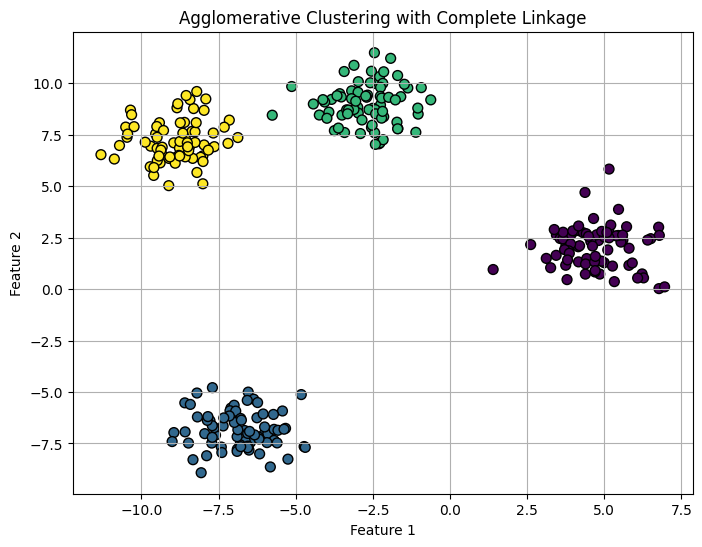

In [13]:
#33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Apply Agglomerative Clustering with complete linkage
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg_clustering.fit_predict(X)

# Step 3: Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')
plt.title("Agglomerative Clustering with Complete Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


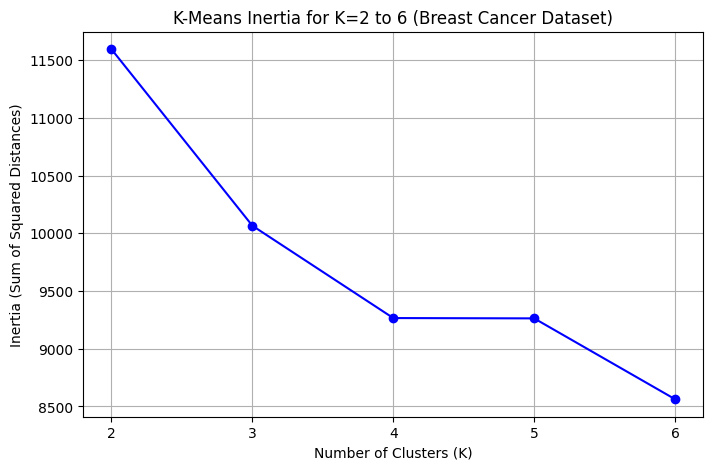

In [14]:
#34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Step 2: Feature scaling for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Compute inertia for K = 2 to 6
inertia_values = []
k_values = range(2, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Step 4: Plot inertia values to visualize the elbow
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('K-Means Inertia for K=2 to 6 (Breast Cancer Dataset)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


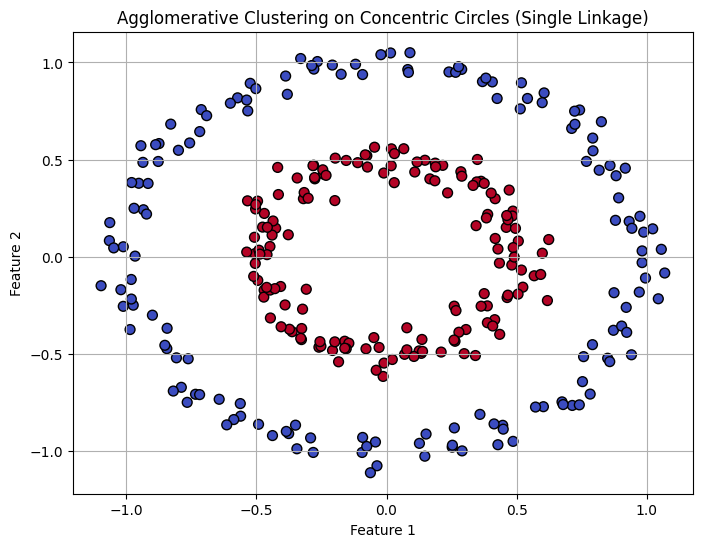

In [15]:
#35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate synthetic concentric circles data
X, y_true = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Step 2: Apply Agglomerative Clustering with single linkage
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg_clustering.fit_predict(X)

# Step 3: Plot the clustered data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', s=50, edgecolor='k')
plt.title("Agglomerative Clustering on Concentric Circles (Single Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [16]:
#36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise).

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load Wine dataset
data = load_wine()
X = data.data

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)  # You can tune eps/min_samples as needed
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count clusters excluding noise (-1 label)
# Unique labels excluding noise
unique_labels = set(labels)
if -1 in unique_labels:
    unique_labels.remove(-1)

num_clusters = len(unique_labels)
print(f"Number of clusters found (excluding noise): {num_clusters}")


Number of clusters found (excluding noise): 0


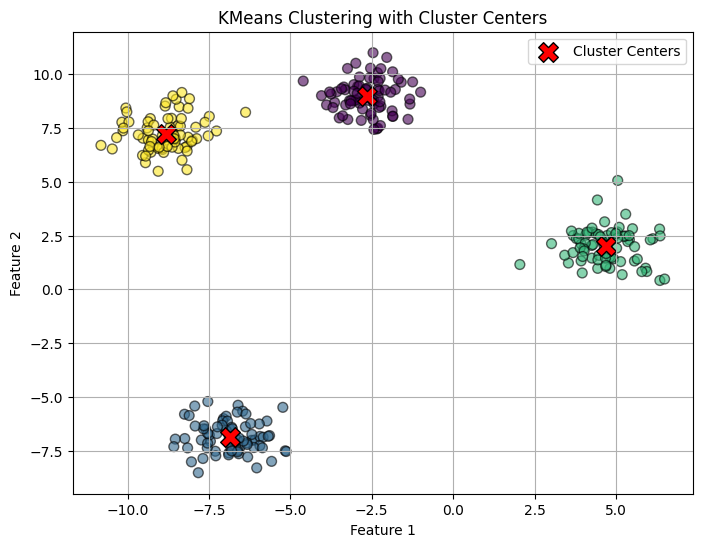

In [17]:
#37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Step 3: Plot data points colored by cluster label
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolor='k')

# Step 4: Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers', edgecolor='k')

plt.title('KMeans Clustering with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
#38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load Iris dataset
iris = load_iris()
X = iris.data

# Step 2: Scale features for better DBSCAN performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.6, min_samples=5)  # eps may need tuning
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count noise samples (label = -1)
num_noise = np.sum(labels == -1)
print(f"Number of noise samples identified by DBSCAN: {num_noise}")


Number of noise samples identified by DBSCAN: 26


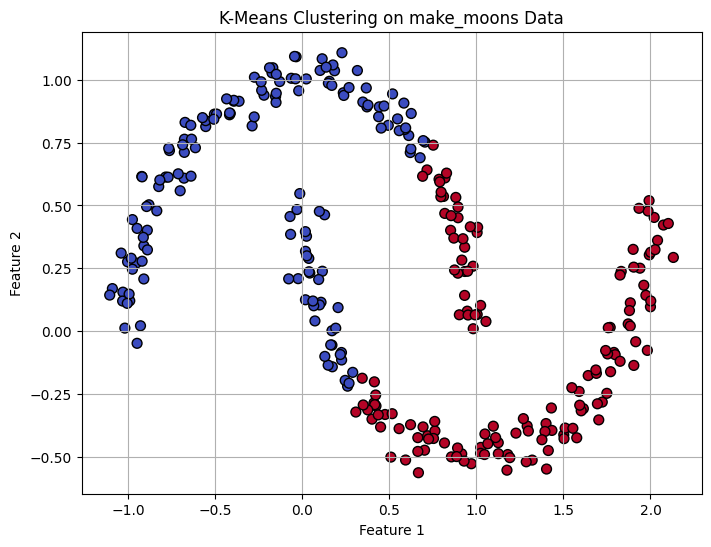

In [19]:
#39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# Step 1: Generate moons data
X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)

# Step 2: Apply K-Means clustering (K=2 since moons have 2 clusters)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Step 3: Visualize clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', s=50, edgecolor='k')
plt.title("K-Means Clustering on make_moons Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


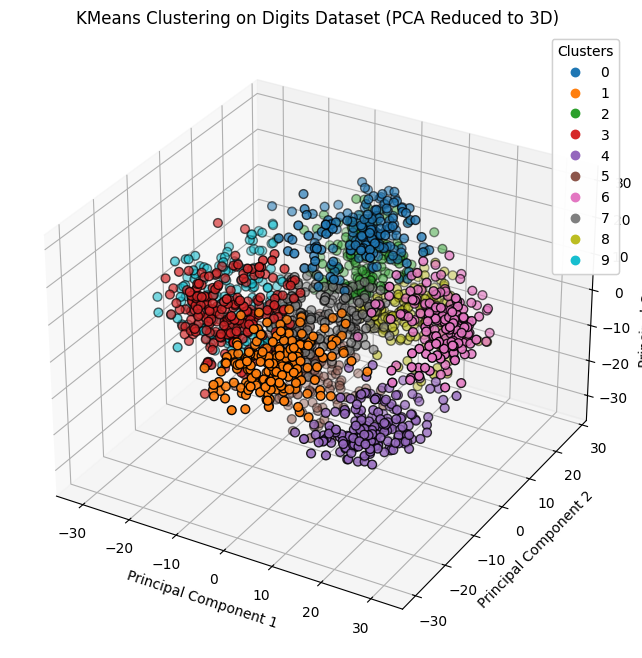

In [20]:
#40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Load Digits dataset
digits = load_digits()
X = digits.data

# Step 2: Apply PCA to reduce dimensions to 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)  # 10 digits/classes
labels = kmeans.fit_predict(X_pca)

# Step 4: Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10', s=40, edgecolor='k')
ax.set_title('KMeans Clustering on Digits Dataset (PCA Reduced to 3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend for clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
ax.add_artist(legend1)

plt.show()


In [21]:
#41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering.

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Generate synthetic blobs with 5 centers
X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Step 3: Calculate silhouette score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score for KMeans with 5 clusters: {sil_score:.4f}")


Silhouette Score for KMeans with 5 clusters: 0.6787


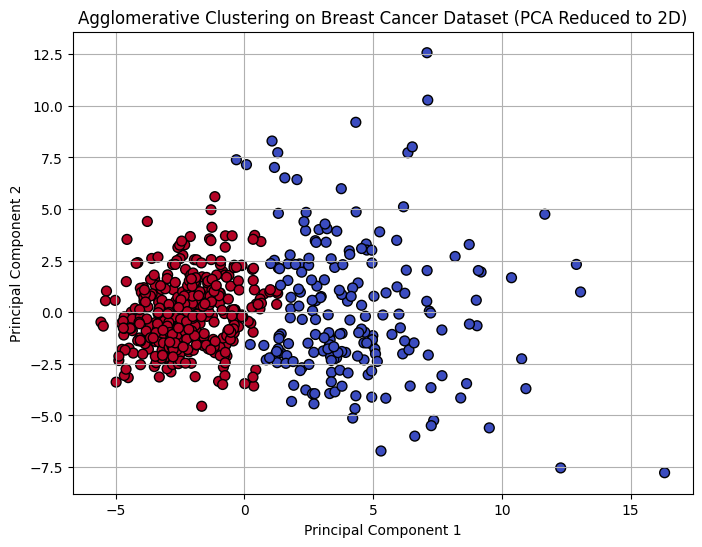

In [22]:
#42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D.

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data

# Step 2: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = agglo.fit_predict(X_pca)

# Step 5: Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm', edgecolor='k', s=50)
plt.title("Agglomerative Clustering on Breast Cancer Dataset (PCA Reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


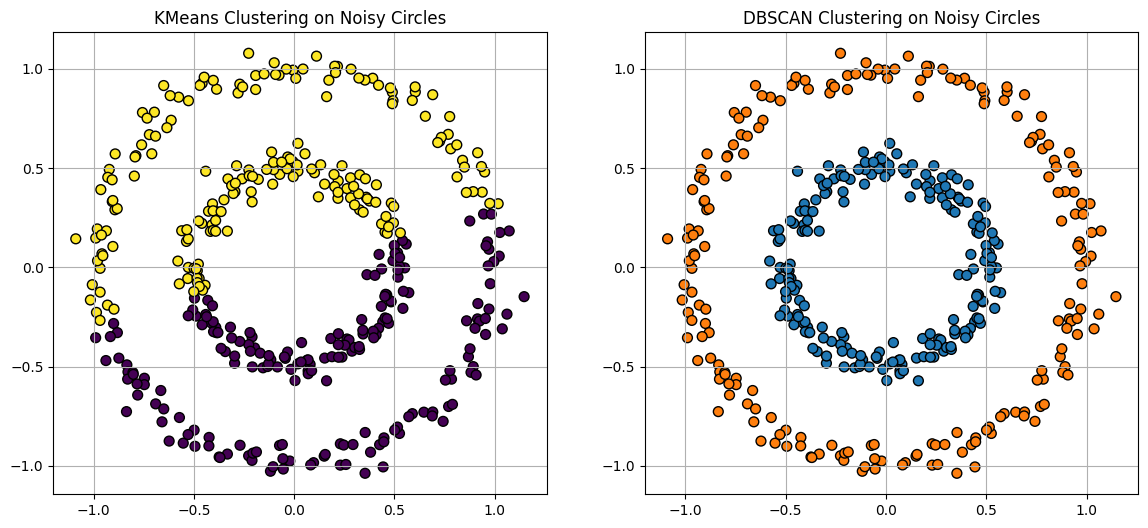

In [23]:
#43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side.

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Generate noisy circular data
X, y_true = make_circles(n_samples=400, noise=0.05, factor=0.5, random_state=42)

# Step 2: Scale data (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans (2 clusters)
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Step 4: Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Step 5: Plot side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# KMeans plot
ax1.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis', edgecolor='k', s=50)
ax1.set_title("KMeans Clustering on Noisy Circles")
ax1.grid(True)

# DBSCAN plot
# Highlight noise points with black color
colors_dbscan = ['black' if label == -1 else f'C{label}' for label in labels_dbscan]
ax2.scatter(X[:, 0], X[:, 1], c=colors_dbscan, edgecolor='k', s=50)
ax2.set_title("DBSCAN Clustering on Noisy Circles")
ax2.grid(True)

plt.show()


Average Silhouette Score: 0.5512


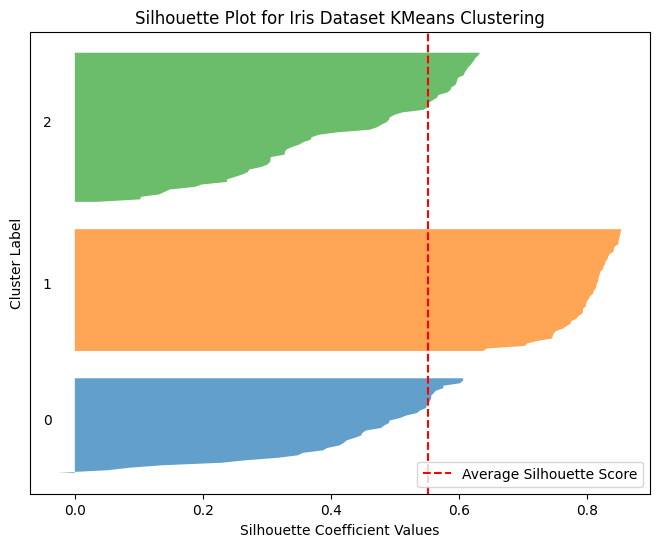

In [24]:
#44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Step 1: Load Iris dataset
iris = load_iris()
X = iris.data

# Step 2: Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Step 3: Compute Silhouette Coefficients for each sample
silhouette_vals = silhouette_samples(X, cluster_labels)
avg_silhouette = silhouette_score(X, cluster_labels)
print(f"Average Silhouette Score: {avg_silhouette:.4f}")

# Step 4: Plot Silhouette Coefficients for each sample sorted by cluster
fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10

for i in range(3):  # 3 clusters
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_vals,
                     alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for spacing between clusters

ax.set_title("Silhouette Plot for Iris Dataset KMeans Clustering")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")
ax.axvline(x=avg_silhouette, color="red", linestyle="--", label="Average Silhouette Score")
ax.set_yticks([])
ax.legend()
plt.show()


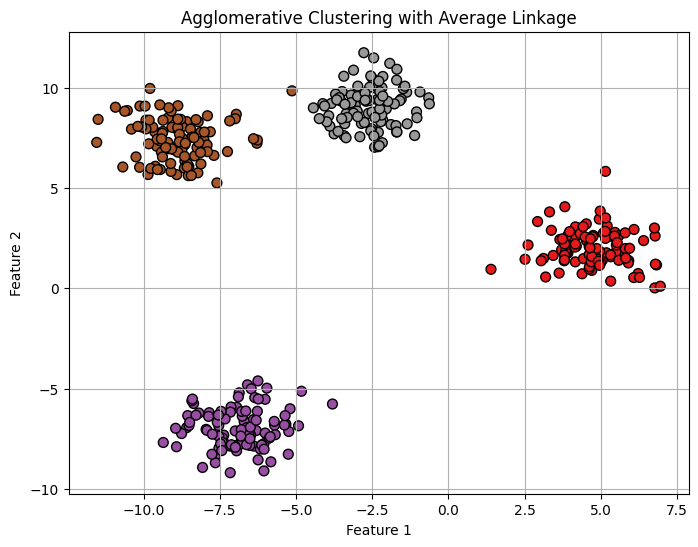

In [25]:
#45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters.

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Apply Agglomerative Clustering with average linkage
agglo = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agglo.fit_predict(X)

# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', edgecolor='k', s=50)
plt.title("Agglomerative Clustering with Average Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


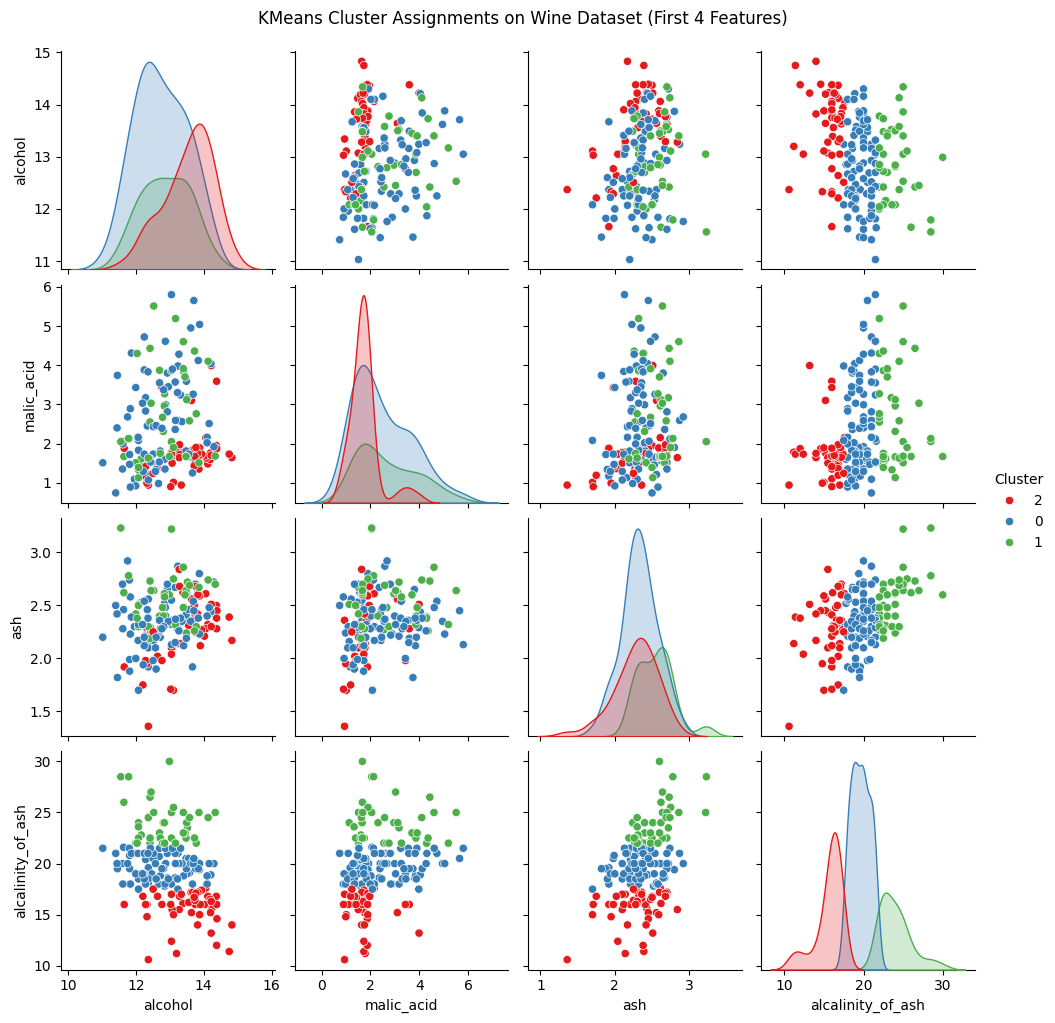

In [26]:
#46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features).

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import pandas as pd

# Step 1: Load Wine dataset
wine = load_wine()
X = wine.data
feature_names = wine.feature_names

# Step 2: Select first 4 features and convert to DataFrame
df = pd.DataFrame(X[:, :4], columns=feature_names[:4])

# Step 3: Apply KMeans clustering (3 clusters since wine dataset has 3 classes)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(df)

# Step 4: Add cluster labels to DataFrame for plotting
df['Cluster'] = cluster_labels.astype(str)  # convert to string for coloring

# Step 5: Plot pairplot colored by cluster assignment
sns.pairplot(df, hue='Cluster', palette='Set1', diag_kind='kde')
plt.suptitle('KMeans Cluster Assignments on Wine Dataset (First 4 Features)', y=1.02)
plt.show()


In [27]:
#47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Generate noisy blobs (with noise by increasing cluster_std)
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

# Step 2: Scale data for DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count clusters (excluding noise) and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters detected: {n_clusters}")
print(f"Number of noise points detected: {n_noise}")


Number of clusters detected: 2
Number of noise points detected: 0


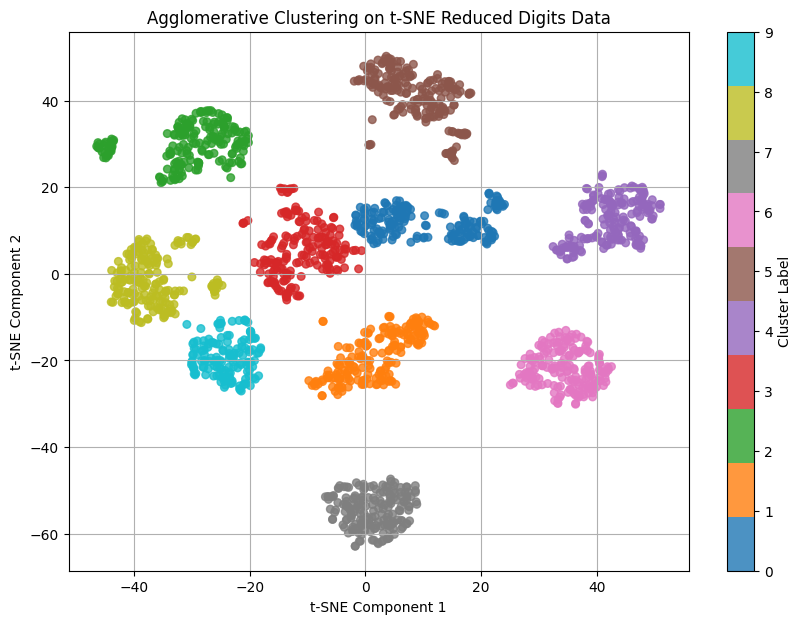

In [28]:
#48.Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Step 1: Load Digits dataset
digits = load_digits()
X = digits.data

# Step 2: Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_embedded = tsne.fit_transform(X)

# Step 3: Apply Agglomerative Clustering on t-SNE output
agglo = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels = agglo.fit_predict(X_embedded)

# Step 4: Plot clusters with scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='tab10', s=30, alpha=0.8)
plt.title("Agglomerative Clustering on t-SNE Reduced Digits Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(scatter, ticks=range(10), label='Cluster Label')
plt.grid(True)
plt.show()
